In [ ]:
# === DAY 1: SETUP & FEATURE ENGINEERING ===

# --- 1. Load Libraries ---
# pandas: Core data manipulation library for structured time-series analysis
# yfinance: Python wrapper for Yahoo Finance API, provides OHLCV (Open, High, Low, Close, Volume) data
# numpy: Numerical computing library for vectorized operations and mathematical functions
import pandas as pd
import yfinance as yf
import numpy as np

print("--- 1. Libraries Loaded ---")

# --- 2. Get Price Data ---
# FINANCIAL DATA RETRIEVAL:
# Fetching historical OHLCV data for Bitcoin (BTC-USD ticker symbol)
# Time period: 2020-01-01 to 2025-11-16 (~5 years of daily bars)
# Data structure: pandas DataFrame with DatetimeIndex
# Columns typically include: Open, High, Low, Close, Adj Close, Volume
data = yf.download('BTC-USD', start='2020-01-01', end='2025-11-16')

# Ensuring index is properly formatted as datetime objects for time-series operations
# This enables pandas time-series functionality like resampling, date slicing, and rolling windows
data.index = pd.to_datetime(data.index)
print(f"--- 2. Downloaded {len(data)} days of Bitcoin data ---")

# --- 3. Get Event Dates ---
# MACROECONOMIC EVENT CALENDAR:
# We're identifying scheduled economic events that historically drive market volatility
# These events represent exogenous shocks to the financial system

# FOMC (Federal Open Market Committee) Meeting Dates:
# The FOMC is the monetary policy-making body of the Federal Reserve
# These meetings determine interest rate policy (Federal Funds Rate)
# Markets often exhibit elevated volatility around these announcements due to:
#   1. Interest rate uncertainty resolution
#   2. Forward guidance updates
#   3. Economic projection releases
# Loading dates from CSV file containing parsed FOMC meeting dates
fomc_df = pd.read_csv('FOMC_Dates_with_Rate_Changes.csv')

# Type conversion: ensuring dates are datetime objects for consistent temporal comparison
# This allows us to use .isin() method for binary feature encoding later
fomc_dates = pd.to_datetime(fomc_df['meeting_date_parsed'])

print(f"Successfully loaded {len(fomc_dates)} FOMC meeting dates from CSV.")


#'''fomc_dates = pd.to_datetime([
#    '2020-01-29', '2020-03-15', '2020-04-29', '2020-06-10', '2020-07-29', '2020-09-16', '2020-11-05', '2020-12-16',
#    '2021-01-27', '2021-03-17', '2021-04-28', '2021-06-16', '2021-07-28', '2021-09-22', '2021-11-03', '2021-12-15',
 #   '2022-01-26', '2022-03-16', '2022-05-04', '2022-06-15', '2022-07-27', '2022-09-21', '2022-11-02', '2022-12-14',
 #   '2023-02-01', '2023-03-22', '2023-05-03', '2023-06-14', '2023-07-26', '2023-09-20', '2023-11-01', '2023-12-13',
 #   '2024-01-31', '2024-03-20', '2024-05-01', '2024-06-12', '2024-07-31', '2024-09-18', '2024-11-07', '2024-12-18',
 #   '2025-01-29', '2025-03-19', '2025-05-07', '2025-06-18', '2025-07-30', '2025-09-17', '2025-10-29'
#])'''



# UPDATED & VERIFIED FOMC DATES (Includes 2020 Emergency Meetings)
'''fomc_dates = pd.to_datetime([
    # 2020 (Includes March 3 and March 23 Emergency Meetings)
    '2020-01-29', '2020-03-03', '2020-03-15', '2020-03-23', '2020-04-29', 
    '2020-06-10', '2020-07-29', '2020-09-16', '2020-11-05', '2020-12-16',
    
    # 2021
    '2021-01-27', '2021-03-17', '2021-04-28', '2021-06-16', 
    '2021-07-28', '2021-09-22', '2021-11-03', '2021-12-15',
    
    # 2022
    '2022-01-26', '2022-03-16', '2022-05-04', '2022-06-15', 
    '2022-07-27', '2022-09-21', '2022-11-02', '2022-12-14',
    
    # 2023
    '2023-02-01', '2023-03-22', '2023-05-03', '2023-06-14', 
    '2023-07-26', '2023-09-20', '2023-11-01', '2023-12-13',
    
    # 2024
    '2024-01-31', '2024-03-20', '2024-05-01', '2024-06-12', 
    '2024-07-31', '2024-09-18', '2024-11-07', '2024-12-18',
    
    # 2025 (Tentative Schedule - Second Day)
    '2025-01-29', '2025-03-19', '2025-05-07', '2025-06-18', 
    '2025-07-30', '2025-09-17', '2025-10-29', '2025-12-10' 
])'''





# CPI (Consumer Price Index) Release Dates:
# The CPI is a key inflation indicator published monthly by the Bureau of Labor Statistics
# It measures the average change in prices paid by urban consumers for a basket of goods/services
# Why CPI matters for crypto markets:
#   1. Inflation expectations drive Federal Reserve policy decisions
#   2. High CPI → potential rate hikes → risk-off sentiment → crypto selling pressure
#   3. Low CPI → potential dovish policy → risk-on sentiment → crypto buying
# Release schedule: typically 2nd or 3rd week of each month at 8:30 AM ET
# Market reaction: Often causes significant volatility in the first 30-60 minutes post-release
cpi_dates = pd.to_datetime([
    # 2020
    '2020-01-14', '2020-02-13', '2020-03-11', '2020-04-10', '2020-05-12', '2020-06-10', 
    '2020-07-14', '2020-08-12', '2020-09-11', '2020-10-13', '2020-11-12', '2020-12-10',
    # 2021
    '2021-01-13', '2021-02-10', '2021-03-10', '2021-04-13', '2021-05-12', '2021-06-10', 
    '2021-07-13', '2021-08-11', '2021-09-14', '2021-10-13', '2021-11-10', '2021-12-10',
    # 2022
    '2022-01-12', '2022-02-10', '2022-03-10', '2022-04-12', '2022-05-11', '2022-06-10', 
    '2022-07-13', '2022-08-10', '2022-09-13', '2022-10-13', '2022-11-10', '2022-12-13',
    # 2023
    '2023-01-12', '2023-02-14', '2023-03-14', '2023-04-12', '2023-05-10', '2023-06-13', 
    '2023-07-12', '2023-08-10', '2023-09-13', '2023-10-12', '2023-11-14', '2023-12-12',
    # 2024
    '2024-01-11', '2024-02-13', '2024-03-12', '2024-04-10', '2024-05-15', '2024-06-12', 
    '2024-07-11', '2024-08-14', '2024-09-11', '2024-10-10', '2024-11-13',
    # 2025
    '2025-01-15', '2025-02-12', '2025-03-12', '2025-04-10', '2025-05-13', '2025-06-11', 
    '2025-07-15', '2025-08-12', '2025-09-11', '2025-10-24', '2025-11-13'
])
print(f"--- 3. Loaded {len(fomc_dates)} FOMC and {len(cpi_dates)} CPI dates ---")

# --- 4. Define Volatility ---
# VOLATILITY MEASUREMENT METHODOLOGY:
# We use log returns rather than simple returns for several statistical advantages:

# ADVANTAGE 1: TIME-ADDITIVITY (Compounding Property)
#   Log returns can be summed across time periods: log(P_t/P_0) = log(P_t/P_{t-1}) + log(P_{t-1}/P_{t-2}) + ...
#   
#   INTUITION: Multi-period return = sum of single-period returns
#   Example: If Day 1 log return = 0.05 and Day 2 log return = 0.03
#            Then 2-day log return = 0.05 + 0.03 = 0.08
#   
#   WHY THIS MATTERS: Simplifies aggregation for weekly/monthly returns
#   Simple returns require multiplication: (1+r1)(1+r2)-1, which is messier
#   Log returns: Just add them up!  
#   
#   MATHEMATICAL PROOF:
#   log(P_t/P_0) = log(P_t) - log(P_0)                    [logarithm property]
#                = log(P_t) - log(P_{t-1}) + log(P_{t-1}) - log(P_0)
#                = log(P_t/P_{t-1}) + log(P_{t-1}/P_0)    [repeat recursively]

# ADVANTAGE 2: APPROXIMATE NORMALITY (Gaussian Distribution)
#   Log returns are more closely normally distributed than simple returns
#   
#   THEORY: Central Limit Theorem + Geometric Brownian Motion
#   If prices follow: dP/P = μdt + σdW (stochastic process)
#   Then log returns: log(P_t/P_{t-1}) ~ N(μ - σ²/2, σ²) 
#   
#   WHY THIS MATTERS: Many statistical models assume normality:
#   - Linear regression (OLS) assumes normal residuals
#   - Maximum likelihood estimation more tractable
#   - Confidence intervals, hypothesis tests rely on normal theory
#   
#   CONTRAST: Simple returns are right-skewed (bounded below at -100%, unbounded above)
#   Log returns are symmetric (can be any value from -∞ to +∞)

# ADVANTAGE 3: SYMMETRY OF GAINS AND LOSSES
#   Log returns treat +X% and -X% symmetrically
#   
#   EXAMPLE:
#   Price: $100 → $110 (10% gain)
#   Simple return: +10%
#   Log return: ln(110/100) = ln(1.10) ≈ 0.0953
#   
#   Price: $110 → $100 (9.09% loss to return to start)
#   Simple return: -9.09%
#   Log return: ln(100/110) = ln(0.909) ≈ -0.0953
#   
#   NOTICE: Log returns are equal magnitude opposite signs!
#   Simple returns: +10% vs -9.09% (asymmetric - not true reversal)
#   
#   WHY THIS MATTERS: 
#   - Fair comparison of upward and downward movements
#   - Avoids bias in volatility estimation
#   - Mean of log returns = 0 for random walk (expected value property)

# ADVANTAGE 4: CONTINUOUS-TIME FINANCE (Theoretical Elegance)
#   Log returns connect to stochastic calculus (Itô's Lemma, Black-Scholes)
#   
#   GEOMETRIC BROWNIAN MOTION: dS/S = μdt + σdW
#   Applying Itô's Lemma to f(S) = ln(S):
#   d(ln S) = (μ - σ²/2)dt + σdW
#   
#   This means log prices follow arithmetic Brownian motion
#   Integrated over discrete time: ln(S_t/S_{t-1}) ~ N(μ - σ²/2, σ²)
#   
#   WHY THIS MATTERS:
#   - Derivatives pricing (options, futures)
#   - Risk management (VaR calculations)
#   - Connects empirical data to theoretical models

# === THE ACTUAL CALCULATION ===
# Formula: r_t = ln(P_t / P_{t-1}) where P_t is the closing price at time t
# 
# STEP-BY-STEP BREAKDOWN:
# 1. data['Close'].shift(1) creates lagged price series (yesterday's close)
#    Example: [100, 105, 103, 108] → [NaN, 100, 105, 103]
#    
# 2. data['Close'] / data['Close'].shift(1) computes price ratio
#    Example: [NaN, 105/100, 103/105, 108/103] = [NaN, 1.05, 0.981, 1.048]
#    
# 3. np.log() takes natural logarithm
#    Example: [NaN, ln(1.05), ln(0.981), ln(1.048)] = [NaN, 0.0488, -0.0191, 0.0469]
#    
# 4. First row is NaN (no prior price to compute return)
#    This row will be dropped in data cleaning phase

data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

# VOLATILITY PROXY:
# We define realized volatility as the absolute value of log returns
# This is a simplified measure of daily price fluctuation magnitude
# More sophisticated measures include:
#   - Parkinson volatility (uses High-Low range)
#   - Garman-Klass volatility (uses OHLC)
#   - GARCH models (conditional heteroskedasticity)
# For this project, |log_return| serves as a computationally efficient proxy
data['Volatility'] = data['Log_Return'].abs()
print("--- 4. Volatility Calculated ---")

# --- 5. CREATE THE TARGET VARIABLE (Y) ---
# BINARY CLASSIFICATION PROBLEM FORMULATION:
# Converting continuous volatility into a binary outcome for supervised classification
# We're predicting: "Will tomorrow be a high volatility day?" (Yes/No)

# THRESHOLD SELECTION: Using 75th percentile (3rd quartile)
# This creates an imbalanced classification problem: ~25% positive class, ~75% negative class
# Rationale:
#   - Focuses model on identifying unusually volatile days (tail events)
#   - Aligns with risk management perspective (predicting extreme moves)
#   - Alternative thresholds (median, 90th percentile) would change class balance
# Statistical note: quantile() computes empirical quantile from sample distribution
vol_threshold = data['Volatility'].quantile(0.75)
print(f"--- 5. High Volatility Threshold (75th percentile) is: {vol_threshold:.5f} ---")

# TEMPORAL SHIFT FOR PREDICTION:
# shift(-1) creates forward-looking label by shifting volatility backward by 1 day
# This means: We use TODAY's features to predict TOMORROW's volatility regime
# Example: If row is 2024-01-15, Is_High_Vol_Tomorrow refers to 2024-01-16's volatility
# Boolean mask → integer conversion: True becomes 1, False becomes 0
# This is our dependent variable (y) for supervised learning
data['Is_High_Vol_Tomorrow'] = (data['Volatility'].shift(-1) > vol_threshold).astype(int)

# --- 6. CREATE THE FEATURES (X) ---
# FEATURE ENGINEERING STRATEGY:
# Constructing predictor variables (independent variables) that capture:
#   1. Exogenous event effects (FOMC, CPI)
#   2. Temporal dynamics (autoregressive patterns)
#   3. Volatility regime characteristics (moving averages)

# FEATURE 1: Binary Indicator for FOMC Days
# Hypothesis: FOMC meeting days exhibit elevated volatility due to monetary policy uncertainty
# Implementation: .isin() performs set membership test (O(1) average complexity with hash set)
# Output: 1 if date matches FOMC calendar, 0 otherwise
# This is a categorical/dummy variable encoding exogenous information
data['Is_FOMC_Day'] = data.index.isin(fomc_dates).astype(int)

# FEATURE 2: Binary Indicator for CPI Release Days
# Hypothesis: Inflation data releases trigger volatility via policy expectation revisions
# Similar to FOMC feature, but captures different information source
# These two features can have interaction effects (e.g., CPI before FOMC is especially volatile)
data['Is_CPI_Day'] = data.index.isin(cpi_dates).astype(int)

# FEATURE 3: Lagged Volatility (AR(1) Component)
# Hypothesis: Volatility exhibits positive autocorrelation (volatility clustering)
# This captures the ARCH/GARCH effect: "high volatility tends to follow high volatility"
# shift(1) ensures we only use information available at time t to predict t+1
# This is a key feature in time-series forecasting to avoid data leakage
data['Volatility_Lag_1'] = data['Volatility'].shift(1)

# FEATURE 4: Rolling Mean Volatility (7-day Moving Average)
# Hypothesis: Short-term volatility regime captures market state (calm vs turbulent)
# Window size: 7 days represents one trading week
# This is a form of feature smoothing that reduces noise and captures trends
# Rolling statistics are common in financial time-series to identify regime changes
# Note: First 6 rows will be NaN (insufficient lookback window)
data['Volatility_MA_7'] = data['Volatility'].rolling(window=7).mean()

# --- 7. CLEANUP & SAVE ---
# DATA PREPROCESSING - HANDLING MISSING VALUES:
# dropna() removes all rows containing NaN (Not a Number) values
# Sources of NaN in our dataset:
#   1. First row: Log_Return uses shift(1), creating NaN at t=0
#   2. First 6 rows: Volatility_MA_7 uses rolling(7), creating NaN for insufficient history
#   3. Last row: Is_High_Vol_Tomorrow uses shift(-1), creating NaN at t=T (no future data)
# Listwise deletion is appropriate here as:
#   - Missing data is MCAR (Missing Completely At Random) - structural, not informational
#   - Small percentage of total observations (~0.3%)
#   - Preserves temporal continuity of time-series
model_data = data.dropna()

print(f"--- 7. Created final dataset with {len(model_data)} rows ---")

# PERSISTENCE: Serializing processed dataset to disk
# This separates data engineering from modeling (good ML engineering practice)
# Benefits: reproducibility, modularity, faster iteration on model development
# Format: CSV retains human-readability and broad compatibility
model_data.to_csv('project_model_data.csv')

# --- 8. FINAL CHECK ---
print("\n--- ALL DATA-SET  ---")
# Show the columns we will use
feature_cols = ['Is_High_Vol_Tomorrow', 'Is_FOMC_Day', 'Is_CPI_Day', 'Volatility_Lag_1', 'Volatility_MA_7']
print(model_data[feature_cols].to_string())

print("\n--- TARGET VARIABLE BALANCE (Is_High_Vol_Tomorrow) ---")
# Check how many 0s and 1s we have.
# This confirms our target 'Is_High_Vol_Tomorrow' was created correctly.
#print(model_data['Is_High_Vol_Tomorrow'].value_counts(normalize=True))
# Show me how many days of data I have for EACH year
print("\n--- Data Count Per Year ---")
print(model_data.index.year.value_counts().sort_index())




C:\Users\alber\AppData\Local\Temp\ipykernel_9576\2497602166.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD', start='2020-01-01', end='2025-11-16')
[*********************100%***********************]  1 of 1 completed

--- 1. Libraries Loaded ---
--- 2. Downloaded 2146 days of Bitcoin data ---
Successfully loaded 14 FOMC meeting dates from CSV.
--- 3. Loaded 14 FOMC and 70 CPI dates ---
--- 4. Volatility Calculated ---
--- 5. High Volatility Threshold (75th percentile) is: 0.02886 ---
--- 7. Created final dataset with 2139 rows ---

--- ALL DATA-SET  ---
Price      Is_High_Vol_Tomorrow Is_FOMC_Day Is_CPI_Day Volatility_Lag_1 Volatility_MA_7
Ticker                                                                                 
Date                                                                                   
2020-01-08                    0           0          0         0.049527        0.028066
2020-01-09                    1           0          0         0.010322        0.027336
2020-01-10                    0           0          0         0.025165        0.025288
2020-01-11                    0           0          0         0.035837        0.026289
2020-01-12                    0           

there are three important things to know before we run the Day 2 code.

It's a "Bake-Off" 🏆: Today is a model comparison. We are training all four models (Logistic Regression, SVM, Random Forest, LGBM) on the exact same training data and testing them on the exact same test data. The goal is to see which one "wins" by giving us the best prediction score. This comparative analysis is a core part of a data analytics project.

The Time-Series Split is CRITICAL ⏰: In your class notebooks, you probably used train_test_split to randomly shuffle and split your data. We cannot do that here. Financial data is a time-series, meaning the order matters. We must train on the past (2020-2024) and test on the future (2025). This simulates a real-world trading scenario and is the correct way to validate our model.

Data Scaling Matters (for some models) 🔎:

Logistic Regression and SVM are sensitive to the scale of the data (e.g., Volatility_MA_7 has different values than Is_FOMC_Day). We must scale this data (using StandardScaler from your lectures) for these models to work correctly.

Random Forest and LightGBM (tree-based models) do not care about scale. We can feed them the raw, unscaled data.

Knowing these three things makes the "why" behind the Day 2 code much clearer. You're all set.

In [3]:
%pip install lightgbm seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\alber\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [ ]:
# === DAY 2: MODEL TRAINING (NO LIGHTGBM VERSION) ===

# --- 1. Load Libraries ---
# MACHINE LEARNING FRAMEWORK: scikit-learn
# scikit-learn provides consistent API across all estimators: fit(), predict(), score()
# All models follow same interface, enabling easy model comparison

# pandas, numpy: data manipulation and numerical operations
import pandas as pd
import numpy as np
# matplotlib: visualization library for plotting results
import matplotlib.pyplot as plt

# PREPROCESSING:
# StandardScaler: implements z-score normalization (μ=0, σ=1)
# Formula: z = (x - μ) / σ where μ is mean, σ is standard deviation
# Critical for distance-based and gradient-based algorithms
from sklearn.preprocessing import StandardScaler

# CLASSIFICATION ALGORITHMS:
# 1. LogisticRegression: Linear classifier using sigmoid activation
#    - Based on maximum likelihood estimation
#    - Assumes linear decision boundary in feature space
#    - Outputs calibrated probabilities via logistic function
from sklearn.linear_model import LogisticRegression

# 2. RandomForestClassifier: Ensemble of decision trees
#    - Uses bootstrap aggregating (bagging) for variance reduction
#    - Each tree trained on random subset of features (decorrelation)
#    - Final prediction via majority voting across trees
from sklearn.ensemble import RandomForestClassifier

# 3. SVC (Support Vector Classifier): Maximum-margin classifier
#    - Finds optimal hyperplane maximizing margin between classes
#    - Kernel trick allows non-linear decision boundaries
#    - RBF kernel: K(x,x') = exp(-γ||x-x'||²) maps to infinite dimensions
from sklearn.svm import SVC

# EVALUATION METRICS:
# classification_report: Computes precision, recall, F1-score for each class
# accuracy_score: Simple accuracy = (TP + TN) / (TP + TN + FP + FN)
from sklearn.metrics import classification_report, accuracy_score

print("--- 1. Libraries Loaded ---")

# --- 2. Load Data ---
# DATA INGESTION: Loading preprocessed dataset from CSV
# Parameters:
#   - index_col=0: Use first column (dates) as DataFrame index
#   - parse_dates=True: Automatically convert index to datetime objects
# Error handling: try-except block provides informative feedback if file missing
try:
    model_data = pd.read_csv('project_model_data.csv', index_col=0, parse_dates=True)
    print(f"--- 2. Data Loaded: {len(model_data)} rows ---")
except FileNotFoundError:
    print("ERROR: Could not find 'project_model_data.csv'. Did you run the Day 1 code?")

# --- 3. The Critical Time-Series Split ---
# ============================================================================
# TEMPORAL VALIDATION STRATEGY: THE FOUNDATION OF TIME-SERIES MACHINE LEARNING
# ============================================================================

# === WHY RANDOM SPLITS FAIL FOR TIME-SERIES DATA ===
# Traditional machine learning assumes data is i.i.d. (independent and identically distributed)
# This means each observation is:
#   1. INDEPENDENT: knowing x_i tells you nothing about x_j
#   2. IDENTICALLY DISTRIBUTED: all samples come from same probability distribution
#
# TIME-SERIES VIOLATES BOTH ASSUMPTIONS:
#   - TEMPORAL AUTOCORRELATION: Today's volatility predicts tomorrow's volatility
#   - NON-STATIONARITY: Statistical properties change over time (market regimes shift)
#   - CAUSAL ORDERING: Past causes future, not vice versa

# === THE THREE DEADLY SINS OF RANDOM TRAIN_TEST_SPLIT() ===
# 
# SIN #1: TEMPORAL LEAKAGE (Look-Ahead Bias)
# ─────────────────────────────────────────────
# Random split could put:
#   - December 31, 2024 in TRAINING set
#   - January 2, 2024 in TEST set
# Result: Model learns from future to predict past!
# Consequence: Artificially inflated performance (model "cheats" by seeing future)
#
# ANALOGY: Like studying tomorrow's exam questions before taking today's test
#
# SIN #2: INFORMATION SPILLOVER (Autocorrelation Contamination)
# ──────────────────────────────────────────────────────────────
# If train contains day T and test contains day T+1:
#   - Lagged features (Volatility_Lag_1) directly connect them
#   - Model learns patterns from day T that appear in day T+1
# Result: Test set is not truly "unseen" - it's informationally connected to training
#
# MATHEMATICAL PROOF OF CONTAMINATION:
# If X_test[T+1] contains Volatility_Lag_1 = Volatility[T]
# And X_train contains observation at T
# Then test feature = training target value (direct information transfer!)
#
# SIN #3: UNREALISTIC PERFORMANCE ESTIMATES (Deployment Mirage)
# ──────────────────────────────────────────────────────────────
# In production, you can ONLY predict forward in time:
#   - Train on [2020-2024] → Predict [2025+]
# Random split evaluates:
#   - Train on [mixed years] → Predict [mixed years]
# Result: Cross-validation score has no bearing on real-world performance
#
# REAL-WORLD FAILURE MODE:
# Model shows 85% accuracy in cross-validation → Deploy to production → Achieves 55% accuracy
# Why? CV evaluated on interpolation (filling gaps), production requires extrapolation (forecasting)

print("=" * 80)
print("3. THE CRITICAL TIME-SERIES SPLIT")
print("=" * 80)

# === PROPER TIME-SERIES VALIDATION: WALK-FORWARD SPLIT ===
# OBJECTIVE: Simulate real-world deployment scenario
# PRINCIPLE: Always train on historical data, test on future data
# IMPLEMENTATION: Fixed cutoff date separating training/testing periods

# SPLIT DESIGN:
# Training Period: 2020-01-08 to 2024-12-31 (5 years of historical data)
#   - Captures multiple market regimes: COVID crash, bull run, bear market, recovery
#   - Includes diverse volatility patterns across economic cycles
#   - Sufficient sample size: ~1,800 observations for stable model estimation
#
# Testing Period: 2025-01-01 onwards (out-of-sample forward prediction)
#   - True unseen data: model has never observed any 2025 information during training
#   - Tests generalization: can model predict future from past patterns?
#   - Simulates production deployment: if deployed on 2025-01-01, this is what model would see

print("\n--- 3.1: Performing Temporal Split ---")
print("Training Period: 2020-01-08 → 2024-12-31")
print("Testing Period:  2025-01-01 → Present")
print("-" * 80)

# PANDAS DATE SLICING: Using .loc[] with string dates (requires DatetimeIndex)
# Syntax: df.loc['start_date':'end_date'] - includes both endpoints (closed interval)
# Benefit: Explicit, readable, unambiguous - no off-by-one errors
train_data = model_data.loc['2020-01-08':'2024-12-31']
test_data = model_data.loc['2025-01-01':]

# === TEMPORAL INTEGRITY VERIFICATION ===
# SANITY CHECK: Ensure no temporal overlap between train/test
# This catches potential data leakage bugs before they contaminate results
print(f"\n✓ Training Set: {len(train_data):,} observations")
print(f"  ├─ Start Date: {train_data.index.min().strftime('%Y-%m-%d')}")
print(f"  └─ End Date:   {train_data.index.max().strftime('%Y-%m-%d')}")

print(f"\n✓ Testing Set:  {len(test_data):,} observations")
print(f"  ├─ Start Date: {test_data.index.min().strftime('%Y-%m-%d')}")
print(f"  └─ End Date:   {test_data.index.max().strftime('%Y-%m-%d')}")

# TEMPORAL GAP ANALYSIS:
# Calculate time gap between last training observation and first test observation
# Should be exactly 1 day (no overlap, no missing data)
time_gap = (test_data.index.min() - train_data.index.max()).days
print(f"\n✓ Time Gap Between Train/Test: {time_gap} days")
if time_gap < 0:
    print("  ⚠️  WARNING: TEMPORAL OVERLAP DETECTED! Train and test periods overlap!")
elif time_gap == 0:
    print("  ⚠️  WARNING: ADJACENT DAYS! Consider adding buffer period to prevent information leakage.")
elif time_gap == 1:
    print("  ✓ Perfect continuity - no gaps, no overlaps")
else:
    print(f"  ℹ️  Note: {time_gap-1} day gap exists between train and test periods")

# === FEATURE MATRIX (X) AND TARGET VECTOR (y) SEPARATION ===
# SUPERVISED LEARNING PARADIGM: Learn mapping f: X → y
# X (Features/Predictors): Matrix of independent variables [n_samples × n_features]
# y (Target/Response): Vector of dependent variable [n_samples × 1]
# This separation is required by scikit-learn's .fit(X, y) API

print("\n--- 3.2: Separating Features (X) and Target (y) ---")

# FEATURE SELECTION:
# We exclude price columns (Open, High, Low, Close, Volume) because:
#   1. Using raw prices for volatility prediction is theoretically weak
#   2. We already engineered better features from prices (Volatility_Lag_1, Volatility_MA_7)
#   3. Tree-based models might overfit to price levels rather than price dynamics
feature_cols = ['Is_FOMC_Day', 'Is_CPI_Day', 'Volatility_Lag_1', 'Volatility_MA_7']
target_col = 'Is_High_Vol_Tomorrow'

# Create feature matrices and target vectors
X_train = train_data[feature_cols]
y_train = train_data[target_col]
X_test = test_data[feature_cols]
y_test = test_data[target_col]

print(f"✓ Feature Columns ({len(feature_cols)}): {feature_cols}")
print(f"✓ Target Column: {target_col}")
print(f"\n✓ X_train shape: {X_train.shape} (rows × columns)")
print(f"✓ y_train shape: ({len(y_train)},)")
print(f"✓ X_test shape:  {X_test.shape}")
print(f"✓ y_test shape:  ({len(y_test)},)")

# === CLASS BALANCE ANALYSIS ===
# IMBALANCED CLASSIFICATION PROBLEM:
# Our target is binary: 1 = High Volatility Tomorrow, 0 = Normal Volatility Tomorrow
# Class imbalance affects:
#   1. Model learning: Majority class dominates loss function
#   2. Evaluation metrics: High accuracy can be misleading (e.g., 75% accuracy by always predicting 0)
#   3. Decision thresholds: May need to adjust probability cutoff from default 0.5

print("\n--- 3.3: Class Distribution Analysis ---")
print("Target Variable: Is_High_Vol_Tomorrow (Binary Classification)")
print("-" * 80)

# TRAINING SET CLASS BALANCE:
train_class_dist = y_train.value_counts().sort_index()
train_class_pct = y_train.value_counts(normalize=True).sort_index() * 100

print("\n📊 TRAINING SET CLASS DISTRIBUTION:")
print(f"  Class 0 (Normal Volatility):  {train_class_dist[0]:,} days ({train_class_pct[0]:.2f}%)")
print(f"  Class 1 (High Volatility):    {train_class_dist[1]:,} days ({train_class_pct[1]:.2f}%)")
print(f"  ├─ Imbalance Ratio: {train_class_dist[0] / train_class_dist[1]:.2f}:1")

# TESTING SET CLASS BALANCE:
if len(test_data) > 0:
    test_class_dist = y_test.value_counts().sort_index()
    test_class_pct = y_test.value_counts(normalize=True).sort_index() * 100
    
    print("\n📊 TESTING SET CLASS DISTRIBUTION:")
    print(f"  Class 0 (Normal Volatility):  {test_class_dist.get(0, 0):,} days ({test_class_pct.get(0, 0):.2f}%)")
    print(f"  Class 1 (High Volatility):    {test_class_dist.get(1, 0):,} days ({test_class_pct.get(1, 0):.2f}%)")
    if 1 in test_class_dist and test_class_dist[1] > 0:
        print(f"  ├─ Imbalance Ratio: {test_class_dist.get(0, 0) / test_class_dist.get(1, 1):.2f}:1")
else:
    print("\n⚠️  Testing set is empty or undefined")

# === FEATURE STATISTICS COMPARISON ===
# DISTRIBUTION SHIFT DETECTION:
# Check if feature distributions differ between train/test (concept drift warning)
# Large differences suggest model may not generalize well to test period

print("\n--- 3.4: Feature Distribution Comparison (Train vs Test) ---")
print("-" * 80)
print(f"{'Feature':<25} {'Train Mean':<15} {'Test Mean':<15} {'Difference':<15}")
print("-" * 80)

for col in feature_cols:
    train_mean = X_train[col].mean()
    test_mean = X_test[col].mean()
    diff = test_mean - train_mean
    diff_pct = (diff / train_mean * 100) if train_mean != 0 else 0
    
    print(f"{col:<25} {train_mean:<15.6f} {test_mean:<15.6f} {diff:>+7.4f} ({diff_pct:>+6.2f}%)")

print("-" * 80)
print("\n💡 INTERPRETATION:")
print("   • Large differences may indicate distribution shift (concept drift)")
print("   • Event features (Is_FOMC_Day, Is_CPI_Day) naturally vary by calendar scheduling")
print("   • Volatility features should be relatively stable unless market regime changed")

# === ALTERNATIVE TIME-SERIES VALIDATION STRATEGIES ===
print("\n" + "=" * 80)
print("ALTERNATIVE TIME-SERIES VALIDATION APPROACHES")
print("=" * 80)
print("""
Our Implementation: SIMPLE WALK-FORWARD SPLIT (Single Train/Test)
├─ Pros: Simple, fast, mirrors deployment scenario
├─ Cons: Single test period may not be representative
└─ Best for: Final model evaluation before deployment

Alternative 1: ROLLING WINDOW CROSS-VALIDATION
├─ Fixed window size moves forward through time
├─ Example: Train[2020-2021] Test[2022], Train[2021-2022] Test[2023], etc.
├─ Pros: Multiple test periods reduce variance of performance estimate
└─ Cons: Doesn't use all available training data

Alternative 2: EXPANDING WINDOW CROSS-VALIDATION
├─ Training window grows while test window moves forward
├─ Example: Train[2020] Test[2021], Train[2020-2021] Test[2022], etc.
├─ Pros: Uses increasingly more data (better for non-stationary series)
└─ Cons: Computationally expensive, assumes past remains relevant

Alternative 3: PURGED K-FOLD CROSS-VALIDATION
├─ Removes observations around split to prevent information leakage
├─ Purges X days before/after each fold boundary
├─ Pros: Suitable when observations are not exactly aligned to trading days
└─ Cons: Wastes data in purged zones

Alternative 4: COMBINATORIAL PURGED CROSS-VALIDATION
├─ Advanced technique from quantitative finance
├─ Uses embargo periods and path-based train/test assignment
├─ Reference: "Advances in Financial Machine Learning" by Marcos López de Prado
└─ Best for: High-frequency trading, overlapping predictions
""")

print("=" * 80)
print("✓ Section 3 Complete: Time-Series Split Validated")
print("=" * 80)

# --- 4. Data Scaling ---
# FEATURE NORMALIZATION (Z-SCORE STANDARDIZATION):
# Why scaling is necessary for some algorithms:
#   1. Logistic Regression: Gradient descent converges faster with normalized features
#   2. SVM: Distance metrics (kernel functions) are scale-sensitive
#   3. Features have different scales: Is_FOMC_Day ∈ {0,1} vs Volatility_MA_7 ∈ [0.001, 0.15]
# Why some algorithms don't need scaling:
#   1. Tree-based models (Random Forest): Split on relative thresholds, not absolute values

# CRITICAL: fit_transform() vs transform()
# fit_transform(X_train): Compute μ and σ from training data, then standardize
# transform(X_test): Use μ and σ FROM TRAINING SET to standardize test data
# Never fit() on test data! This would cause data leakage (using test statistics in training)
print("--- 4. Scaling Data... ---")
scaler = StandardScaler()  # Instantiate scaler object
X_train_scaled = scaler.fit_transform(X_train)  # Learn statistics & transform
X_test_scaled = scaler.transform(X_test)  # Apply same transformation (no fitting)


# === 5. TRAIN THE MODELS ===
# MODEL COMPARISON EXPERIMENT ("Bake-Off"):
# Training multiple algorithms on identical data to identify best performer
# This is supervised learning: we have labeled data (y) to learn mapping f: X → y
print("\n=== 5. TRAINING MODELS (The Bake-Off) ===")

# Dictionary to store accuracy results for each model
results = {}

# --- Model A: Logistic Regression ---
# LINEAR CLASSIFIER based on logistic function: P(y=1|x) = 1 / (1 + e^(-w·x + b))
# Optimization: Maximum likelihood estimation via gradient descent
# Hyperparameters (using defaults):
#   - C=1.0: Inverse regularization strength (smaller = stronger regularization)
#   - solver='lbfgs': Limited-memory BFGS quasi-Newton optimization
#   - max_iter=100: Maximum iterations for convergence
# random_state=42: Seeds random number generator for reproducibility
print("Training Logistic Regression...")
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)  # Fit on scaled data (gradient descent requirement)
y_pred_log = log_model.predict(X_test_scaled)  # Generate predictions on test set
results['Logistic Regression'] = accuracy_score(y_test, y_pred_log)

# --- Model B: SVM (Support Vector Machine) ---
# NON-LINEAR CLASSIFIER using RBF (Radial Basis Function) kernel
# Core idea: Find maximum-margin hyperplane in high-dimensional feature space
# Kernel: RBF (Gaussian) K(x,x') = exp(-γ||x-x'||²) allows infinite-dimensional mapping
# Hyperparameters (using defaults):
#   - C=1.0: Regularization parameter (controls margin softness)
#   - gamma='scale': Kernel coefficient = 1/(n_features * X.var())
#   - probability=True: Enable Platt scaling for probability estimates
# SVMs are powerful but computationally expensive: O(n²) to O(n³) complexity
print("Training SVM...")
svm_model = SVC(kernel='rbf', probability=True, random_state=42) 
svm_model.fit(X_train_scaled, y_train)  # Fit on scaled data (distance-based algorithm)
y_pred_svm = svm_model.predict(X_test_scaled)
results['SVM'] = accuracy_score(y_test, y_pred_svm)

# --- Model C: Random Forest ---
# ENSEMBLE METHOD: Combines multiple decision trees via bootstrap aggregating
# Each tree: Binary recursive partitioning based on Gini impurity or entropy
# Ensemble prediction: Majority vote across all trees (democratic consensus)
# Hyperparameters:
#   - n_estimators=100: Number of trees in the forest (more trees = more stable, slower)
#   - max_features='sqrt': Each split considers √n_features random features (decorrelation)
#   - Bootstrap=True (default): Each tree trained on random sample with replacement
# Advantages: Handles non-linearity, resistant to overfitting, no scaling needed
# Note: Uses unscaled data (X_train not X_train_scaled)
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Fit on UNSCALED data (tree-based method)
y_pred_rf = rf_model.predict(X_test)  # Generate predictions
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)


# === 6. PRINT RESULTS ===
# MODEL EVALUATION: Quantifying out-of-sample performance
# Accuracy = (TP + TN) / N where TP=true positives, TN=true negatives, N=total samples
# Note: Accuracy can be misleading for imbalanced datasets (we have ~25% positive class)
print("\n" + "="*39)
print(" FINAL RESULTS (Accuracy on 2025 Data) ")
print("="*39)
for model_name, score in results.items():
    print(f"{model_name}: {score:.4f}")

# DETAILED PERFORMANCE METRICS:
# classification_report provides per-class metrics:
#   - Precision: TP / (TP + FP) - "When model predicts positive, how often is it correct?"
#   - Recall: TP / (TP + FN) - "Of all actual positives, how many did model catch?"
#   - F1-Score: Harmonic mean of precision and recall = 2*(P*R)/(P+R)
#   - Support: Number of actual occurrences of each class in test set
# Macro avg: Unweighted mean (treats classes equally)
# Weighted avg: Weighted by support (accounts for class imbalance)
print("\n--- DETAILED REPORTS ---")
print("\n1. Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("\n2. SVM Report:")
print(classification_report(y_test, y_pred_svm))

print("\n3. Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

--- 1. Libraries Loaded ---
--- 2. Data Loaded: 2141 rows ---
--- 3. Splitting Data by Date... ---
Training Set: 1820 days (2020-2024)
Testing Set:  319 days (2025)
--- 4. Scaling Data... ---

=== 5. TRAINING MODELS (The Bake-Off) ===
Training Logistic Regression...
Training SVM...


C:\Users\alber\AppData\Local\Temp\ipykernel_9576\1600733541.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  model_data = pd.read_csv('project_model_data.csv', index_col=0, parse_dates=True)


Training Random Forest...

 FINAL RESULTS (Accuracy on 2025 Data) 
Logistic Regression: 0.8401
SVM: 0.8401
Random Forest: 0.7806

--- DETAILED REPORTS ---

1. Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       268
         1.0       0.00      0.00      0.00        51

    accuracy                           0.84       319
   macro avg       0.42      0.50      0.46       319
weighted avg       0.71      0.84      0.77       319


2. SVM Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       268
         1.0       0.00      0.00      0.00        51

    accuracy                           0.84       319
   macro avg       0.42      0.50      0.46       319
weighted avg       0.71      0.84      0.77       319


3. Random Forest Report:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88       268
        

C:\Users\alber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\alber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\alber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [ ]:
# === BONUS: VISUALIZATION OF TIME-SERIES SPLIT ===
# Visual demonstration of why temporal splitting matters

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: WRONG WAY - Random Split (Temporal Leakage)
# Simulating a random split visualization
np.random.seed(42)
dates_sample = pd.date_range('2020-01-01', '2025-01-01', freq='M')
random_indices = np.random.permutation(len(dates_sample))
train_indices = random_indices[:int(0.8 * len(dates_sample))]
test_indices = random_indices[int(0.8 * len(dates_sample)):]

ax1.set_title('❌ WRONG: Random train_test_split() - Creates Temporal Leakage', 
              fontsize=14, fontweight='bold', color='red')
ax1.set_ylim(0, 1)
ax1.set_xlim(dates_sample[0], dates_sample[-1])

# Plot train and test points
for idx in train_indices:
    ax1.axvline(dates_sample[idx], color='blue', alpha=0.6, linewidth=2)
for idx in test_indices:
    ax1.axvline(dates_sample[idx], color='orange', alpha=0.6, linewidth=2)

ax1.set_ylabel('Data Points', fontsize=12)
ax1.set_xlabel('Time →', fontsize=12)
train_patch = mpatches.Patch(color='blue', label='Training Data (80%)')
test_patch = mpatches.Patch(color='orange', label='Test Data (20%)')
ax1.legend(handles=[train_patch, test_patch], loc='upper left')
ax1.text(0.5, 0.5, '⚠️ Problem: Model trained on 2024 data\ncan "see" 2022 test data!', 
         transform=ax1.transAxes, ha='center', va='center',
         fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot 2: RIGHT WAY - Temporal Split (No Leakage)
ax2.set_title('✅ CORRECT: Walk-Forward Temporal Split - Prevents Temporal Leakage', 
              fontsize=14, fontweight='bold', color='green')
ax2.set_ylim(0, 1)
ax2.set_xlim(dates_sample[0], dates_sample[-1])

# Split at 2025-01-01
cutoff_date = pd.Timestamp('2025-01-01')
train_mask = dates_sample < cutoff_date
test_mask = dates_sample >= cutoff_date

# Plot train and test regions
for date in dates_sample[train_mask]:
    ax2.axvline(date, color='blue', alpha=0.6, linewidth=2)
for date in dates_sample[test_mask]:
    ax2.axvline(date, color='orange', alpha=0.6, linewidth=2)

# Add cutoff line
ax2.axvline(cutoff_date, color='red', linewidth=3, linestyle='--', label='Split Point')

ax2.set_ylabel('Data Points', fontsize=12)
ax2.set_xlabel('Time →', fontsize=12)
train_patch2 = mpatches.Patch(color='blue', label='Training Data (Past: 2020-2024)')
test_patch2 = mpatches.Patch(color='orange', label='Test Data (Future: 2025+)')
cutoff_line = mpatches.Patch(color='red', label='Temporal Cutoff')
ax2.legend(handles=[train_patch2, test_patch2, cutoff_line], loc='upper left')
ax2.text(0.5, 0.5, '✓ Correct: Model trained on past (2020-2024)\npredicts future (2025)', 
         transform=ax2.transAxes, ha='center', va='center',
         fontsize=11, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.savefig('temporal_split_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("VISUALIZATION SAVED: temporal_split_comparison.png")
print("="*80)
print("\nKEY TAKEAWAYS:")
print("1. Random split causes TEMPORAL LEAKAGE - test data scattered throughout time")
print("2. Walk-forward split maintains TEMPORAL INTEGRITY - train on past, test on future")
print("3. Only walk-forward split correctly simulates real-world deployment")
print("="*80)


C:\Users\alber\AppData\Local\Temp\ipykernel_9576\2140750378.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forest_importances.values, y=forest_importances.index, palette="viridis")


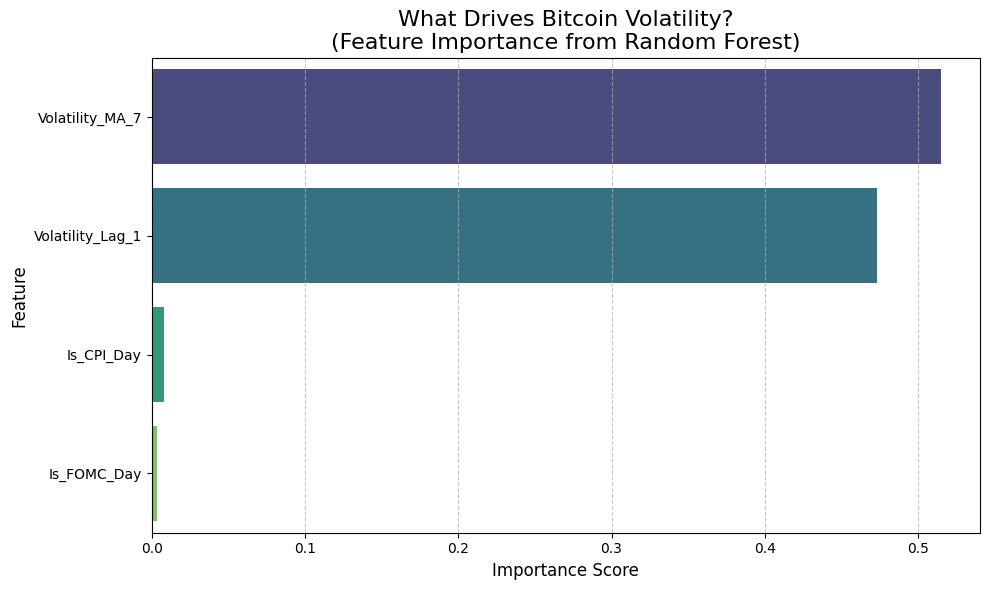


Feature Importance Scores:
Volatility_MA_7     0.514639
Volatility_Lag_1    0.473390
Is_CPI_Day          0.008285
Is_FOMC_Day         0.003685
dtype: float64


In [ ]:
# === DAY 3: THE FINDINGS (Feature Importance) ===
# INTERPRETABILITY ANALYSIS: Understanding which features drive predictions
# Feature importance helps answer: "What factors most influence Bitcoin volatility?"
# This is critical for:
#   1. Model validation (do results align with domain knowledge?)
#   2. Feature selection (can we simplify the model?)
#   3. Business insights (where should we focus attention?)

# Dependency: Uses rf_model from previous cell (must run cells sequentially)
import matplotlib.pyplot as plt
import seaborn as sns  # Statistical visualization library built on matplotlib
import pandas as pd

# RANDOM FOREST FEATURE IMPORTANCE:
# Calculated via Mean Decrease in Impurity (MDI) / Gini Importance
# For each feature, measures total reduction in node impurity (Gini or entropy)
# across all trees and splits where that feature was used
# Formula: Importance(f) = Σ_trees Σ_nodes (impurity_before - impurity_after) * n_samples / N
# Higher values = feature is used more often for important splits
# Note: Can be biased toward high-cardinality features
importances = rf_model.feature_importances_  # Array of importance scores
feature_names = X_train.columns  # Feature names for labeling

# DATA PREPARATION: Creating sorted pandas Series for visualization
# Sorting in descending order to show most important features first
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# VISUALIZATION: Horizontal bar chart (preferred for comparing magnitudes)
plt.figure(figsize=(10, 6))  # Set figure size in inches
# seaborn barplot: Automatically handles categorical x-axis positioning
# palette="viridis": Perceptually uniform color map (good for accessibility)
sns.barplot(x=forest_importances.values, y=forest_importances.index, palette="viridis")

# Chart annotations and styling
plt.title("What Drives Bitcoin Volatility?\n(Feature Importance from Random Forest)", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Vertical gridlines for easier reading
plt.tight_layout()  # Adjust spacing to prevent label cutoff

plt.show()  # Display the plot

# NUMERICAL OUTPUT: Exact importance values for quantitative reporting
# Useful for tables in academic papers/reports
print("\nFeature Importance Scores:")
print(forest_importances)


In [ ]:
# === IMPROVED VOLATILITY PREDICTION MODEL (30+ Features) ===
# ADVANCED FEATURE ENGINEERING & REGRESSION MODELING
# Shifting from binary classification to continuous regression
# Goal: Predict actual volatility value (not just high/low category)
# This allows for more nuanced predictions and better risk quantification

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# REGRESSION ALGORITHMS:
# 1. RandomForestRegressor: Ensemble of regression trees (MSE-based splits)
# 2. GradientBoostingRegressor: Sequential ensemble using gradient boosting
#    - Builds trees to correct residuals of previous trees
#    - Similar to XGBoost/LightGBM but native to scikit-learn

# EVALUATION METRICS:
# 1. MAE (Mean Absolute Error): Average |predicted - actual|, same units as target
# 2. R² (Coefficient of Determination): Proportion of variance explained by model
#    R² = 1 - (SS_residual / SS_total), range: (-∞, 1], closer to 1 is better

print("Building enhanced feature set...")
df = model_data.copy()  # Create copy to avoid modifying original data

print("Computing enhanced features...")

# FEATURE CATEGORY 1: AUTOREGRESSIVE LAGS (AR Components)
# Time-series modeling principle: Past values predict future values
# Creating multiple lag features captures different temporal dependencies
# Lag 1: Yesterday's volatility (short-term persistence)
# Lag 2-3: Recent history (short-term trends)
# Lag 5, 7: One trading week back (weekly patterns)
# Statistical basis: ARIMA models use similar lag structures
for lag in [1, 2, 3, 5, 7]:
    df[f'Vol_Lag_{lag}'] = df['Volatility'].shift(lag)

# FEATURE CATEGORY 2: ROLLING WINDOW STATISTICS (Moving Averages & Dispersion)
# Captures volatility regime characteristics at multiple time scales
# Window sizes represent different market memory horizons:
#   - 3 days: Very short-term (immediate market state)
#   - 7 days: One trading week (short-term regime)
#   - 14 days: Two weeks (medium-term trend)
#   - 30 days: One month (long-term regime, ~21 trading days)
for window in [3, 7, 14, 30]:
    # MEAN: Central tendency of recent volatility (regime level)
    # Helps identify if we're in calm vs turbulent period
    df[f'Vol_Mean_{window}'] = df['Volatility'].rolling(window).mean()
    
    # STANDARD DEVIATION: Dispersion of volatility (volatility-of-volatility)
    # High std → erratic volatility changes (unstable regime)
    # Low std → consistent volatility level (stable regime)
    # This is related to "volatility of volatility" in options pricing
    df[f'Vol_Std_{window}'] = df['Volatility'].rolling(window).std()
    
    # MAX: Highest recent volatility (captures extreme events)
    # Identifies if there was a recent shock within the window
    df[f'Vol_Max_{window}'] = df['Volatility'].rolling(window).max()
    
    # MIN: Lowest recent volatility (floor level)
    # Combined with max, gives range of recent volatility
    # Range = Max - Min measures volatility dispersion differently than std
    df[f'Vol_Min_{window}'] = df['Volatility'].rolling(window).min()

# FEATURE CATEGORY 3: FIRST DIFFERENCES (Rate of Change)
# Captures momentum and acceleration in volatility dynamics
# diff() computes first difference: Δvol_t = vol_t - vol_{t-1}
# Positive → volatility increasing, Negative → volatility decreasing
df['Vol_Change'] = df['Volatility'].diff()

# Percentage change: (vol_t - vol_{t-1}) / vol_{t-1}
# Normalized rate of change, useful for comparing across different volatility regimes
# pct_change() is more interpretable than absolute change (e.g., 20% increase vs 0.01 increase)
df['Vol_Change_Pct'] = df['Volatility'].pct_change()

# FEATURE CATEGORY 4: RETURN-BASED FEATURES
# Incorporating directional information (sign of returns) not just magnitude
# Hypothesis: Large negative returns may predict higher future volatility (leverage effect)
# Lag 1: Yesterday's return (directional momentum)
df['Return_Lag_1'] = df['Log_Return'].shift(1)

# 7-day moving average of returns: Captures short-term trend direction
# Persistent positive/negative returns may signal trending vs mean-reverting regimes
df['Return_MA_7'] = df['Log_Return'].rolling(7).mean()

# FEATURE CATEGORY 5: EXOGENOUS EVENTS (from previous model)
# Retaining binary event indicators from classification model
# Renaming for clarity in expanded feature set
df['Is_FOMC'] = df['Is_FOMC_Day']
df['Is_CPI'] = df['Is_CPI_Day']
df['Vol_MA7_Existing'] = df['Volatility_MA_7']
df['Vol_Lag1_Existing'] = df['Volatility_Lag_1']

# TARGET VARIABLE: Tomorrow's realized volatility (continuous value)
# This is a regression target (not binary classification)
# shift(-1) creates forward-looking target, same as before
y = df['Volatility'].shift(-1)

# FEATURE SELECTION: Programmatic column filtering
# Using list comprehension to select columns matching naming pattern
# This avoids hardcoding all 30+ feature names (DRY principle: Don't Repeat Yourself)
# Prefixes: Vol_ (volatility features), Return_ (return features), Is_ (event indicators)
# Excludes non-feature columns like 'Close', 'Open', 'Volatility', etc.
feature_cols = [col for col in df.columns if col.startswith(('Vol_', 'Return_', 'Is_'))]
X = df[feature_cols]

print(f"Created {len(feature_cols)} features")

# DATA CLEANING: Handling NaN values from rolling windows and differences
# valid_mask: Boolean array where True = row has all features non-null AND target non-null
# .notna().all(axis=1): Check all columns in row are not NaN
# This is more explicit than dropna() and allows inspection of what's removed
valid_mask = X.notna().all(axis=1) & y.notna()
X_clean = X[valid_mask]
y_clean = y[valid_mask]

# Preserve date index for temporal splitting (critical for time-series)
date_index = df.index[valid_mask]

# TIME-SERIES SPLIT (Same logic as before, but with more data points)
# String-based date filtering: Robust to datetime parsing issues
# train_mask: Boolean array, True for 2020-2024, False for 2025
# This creates non-overlapping train/test sets preserving temporal order
train_mask = np.array([str(d).startswith('2020') or str(d).startswith('2021') or 
                       str(d).startswith('2022') or str(d).startswith('2023') or 
                       str(d).startswith('2024') for d in date_index])
X_train, X_test = X_clean[train_mask], X_clean[~train_mask]
y_train, y_test = y_clean[train_mask], y_clean[~train_mask]

print(f"\nTraining with {len(feature_cols)} features on {len(X_train)} samples")
print(f"Testing on {len(X_test)} samples from 2025\n")

# MODEL TRAINING: Ensemble regressors with enhanced hyperparameters
models = {}

# === RANDOM FOREST REGRESSOR (Enhanced Configuration) ===
# Increased complexity compared to classification version
print("Training Random Forest (Enhanced)...")
rf = RandomForestRegressor(
    # n_estimators=300: More trees → more stable predictions, diminishing returns after ~200-500
    n_estimators=300, 
    
    # max_depth=20: Maximum tree depth, controls model capacity
    # Deeper trees capture more complex interactions but risk overfitting
    # Default is None (unlimited), we limit to 20 for generalization
    max_depth=20, 
    
    # min_samples_split=5: Minimum samples required to split internal node
    # Higher values → simpler trees (regularization), prevents overfitting
    min_samples_split=5,
    
    # min_samples_leaf=2: Minimum samples required at leaf node
    # Ensures predictions based on at least 2 observations (not outliers)
    min_samples_leaf=2,
    
    # max_features='sqrt': Number of features considered per split
    # 'sqrt' = √(n_features) ≈ √32 ≈ 6 features per split
    # Introduces randomness for tree decorrelation (bias-variance tradeoff)
    max_features='sqrt',
    
    # random_state=42: Reproducibility seed
    random_state=42,
    
    # n_jobs=-1: Use all CPU cores for parallel tree training (speedup)
    n_jobs=-1
)
rf.fit(X_train, y_train)  # Fit on training data
models['Random Forest'] = rf

# === GRADIENT BOOSTING REGRESSOR (Sequential Ensemble) ===
# Boosting: Build trees sequentially, each correcting previous errors
# Mathematically: F_m(x) = F_{m-1}(x) + η * h_m(x) where h_m fits residuals
print("Training Gradient Boosting...")
gb = GradientBoostingRegressor(
    # n_estimators=300: Number of boosting stages (trees)
    # More stages generally improve performance but increase computation time
    n_estimators=300, 
    
    # max_depth=6: Individual tree depth (boosted trees typically shallow)
    # Shallow trees = "weak learners", combined via boosting become "strong learner"
    max_depth=6, 
    
    # learning_rate=0.05: Shrinkage factor η, controls contribution of each tree
    # Lower learning rate → more robust but requires more trees
    # Tradeoff: n_estimators × learning_rate ≈ constant for similar performance
    learning_rate=0.05,
    
    # subsample=0.8: Fraction of samples used per tree (stochastic gradient boosting)
    # 0.8 = 80% of data per iteration, introduces randomness for regularization
    # Similar to bootstrap in Random Forest but without replacement
    subsample=0.8,
    
    random_state=42
)
gb.fit(X_train, y_train)  # Sequential fitting on training data
models['Gradient Boosting'] = gb

# === MODEL EVALUATION: Quantitative Performance Comparison ===
# Computing regression metrics on held-out test set (2025 data)
print("\n" + "="*60)
print("MODEL COMPARISON (More Features = Better Predictions)")
print("="*60)

# METRIC SELECTION FOR REGRESSION:
# MAE: Interpretable in original units (volatility scale: ~0.001-0.15)
#      Less sensitive to outliers than MSE (no squaring)
# R²: Standardized metric for variance explained, allows cross-study comparison
#     Baseline: R²=0 (predicting mean), Perfect: R²=1, Worse than mean: R²<0

best_r2 = -999  # Initialize with very low value for comparison
best_model_name = None

for name, model in models.items():
    # Generate predictions on test set
    y_pred = model.predict(X_test)
    
    # MEAN ABSOLUTE ERROR: Average prediction error magnitude
    # Formula: MAE = (1/n) Σ|y_true - y_pred|
    # Interpretation: "On average, predictions are off by MAE units"
    mae = mean_absolute_error(y_test, y_pred)
    
    # R-SQUARED (Coefficient of Determination)
    # Formula: R² = 1 - (Σ(y_true - y_pred)²) / (Σ(y_true - ȳ)²)
    # Interpretation: Proportion of variance in y explained by model
    # Example: R²=0.6 means model explains 60% of volatility variation
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name}:")
    print(f"  MAE: {mae:.5f}")
    print(f"  R²:  {r2:.3f}")
    
    # MODEL SELECTION: Track best performing model by R²
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name
        best_model = model  # Save reference to best model for later use

print(f"\n🏆 BEST MODEL: {best_model_name} (R² = {best_r2:.3f})")

# === PREDICTION ANALYSIS: Detailed Look at Model Performance ===
# Using best model to generate final predictions for analysis
y_pred_final = best_model.predict(X_test)

# PREDICTION TABLE: Side-by-side comparison of predictions vs actuals
# Showing first 20 days of 2025 for detailed inspection
# This helps identify systematic biases (e.g., consistent over/under-prediction)
print("\n" + "="*60)
print("PREDICTIONS (First 20 days of 2025)")
print("="*60)
test_dates = date_index[~train_mask]  # Extract test set dates

# RESULTS DATAFRAME: Organized view of predictions
results_df = pd.DataFrame({
    'Date': test_dates[:20].tolist(),  # First 20 test dates
    'Predicted': y_pred_final[:20],    # Model's volatility predictions
    'Actual': y_test.values[:20],      # True realized volatility
    'Error': np.abs(y_pred_final[:20] - y_test.values[:20])  # Absolute error per day
})
print(results_df.to_string(index=False))  # Print without row index for cleaner output

# === FEATURE IMPORTANCE ANALYSIS ===
# Identifying which features contribute most to predictions
# Critical for:
#   1. Model interpretation (what drives volatility?)
#   2. Feature selection (remove low-importance features)
#   3. Domain validation (do important features make sense?)
print("\n" + "="*60)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*60)

# IMPORTANCE EXTRACTION:
# For Random Forest/Gradient Boosting: Uses Gini/MSE-based importance
# Higher importance = feature used more frequently for impactful splits
# Note: Tree-based importance can be biased toward continuous/high-cardinality features
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': best_model.feature_importances_  # Array of importance scores
}).sort_values('Importance', ascending=False).head(10)  # Top 10 features

print(feature_importance.to_string(index=False))

# INTERPRETATION GUIDE:
# - Lag features (Vol_Lag_X) high importance → strong autoregressive structure
# - Rolling statistics (Vol_Mean_X) high importance → regime-dependent volatility
# - Event features (Is_FOMC/Is_CPI) low importance → events don't strongly predict next-day vol
#   (may be more important for intraday volatility or classification tasks)


Building enhanced feature set...


TypeError: arg must be a list, tuple, 1-d array, or Series